# Introduction to Agent-Based Simulators

## Introduction

Now that we have covered two cellular automata in the course, we will continue to increase the level of sophistication and complexity of our models. 

In this module, we will add the concept of agents to our models. These agents are TODO and use them to study the behaviours that occur in the system when we test different thresholds or policies.

In preparation for the module, please review the following introductory article about agent-based models.

https://simudyne.com/resources/how-do-agent-based-models-work/

## Concepts

Below you will find a list of important concepts we will review in the module.

- Agent-based models
- Agents
- Schelling's model
- Segregation models
- Policies TODO?

## Interaction

In this interaction, we will study Schelling's segregation model. The model was created by the American economist Thomas Schelling in the 1970s.

The model has two types of agents, agent types A and B, that operate on a two-dimensional grid (similar to Conway's cellular automata). Each cell of the grid can be in one of three states:

- Occupied by an agent of type A
- Occupied by an agent of type B
- Unoccupied or vacant

Each agent, whether type A or B, has a preference regarding the type of neighbours they want to be surrounded by. An agent wants at least a certain fraction of its neighbours to be of the same type. If this preference is not met, the agent is considered "unhappy" and will want to move. 

Schelling's model explains how small preferences for one's neighbours to be of the same type can lead to large-scale patterns of segregation, even when individuals do not have an intrinsic or strong preference to be separated from others.

### Instructions

Test the following tolerance thresholds:
- Average tolerance
- High tolerance
- Low tolerance

Determine the patterns that emerge in the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc, colors

rc('animation', html='html5')

In [2]:
def initialize_grid(grid_size, minority_ratio): # Creates a grid and randomly allocates the agents
    grid = np.random.choice([0, 1, 2], size=(grid_size, grid_size), p=[1 - minority_ratio, minority_ratio / 2, minority_ratio / 2])
    return grid

In [72]:
def count_neighbors(grid, x, y, agent_type, radius=1): # Counts the number of similar neighbors
    neighbors = grid[max(0, x - radius): min(x + radius + 1, grid.shape[0]),
                     max(0, y - radius): min(y + radius + 1, grid.shape[1])]
    return np.count_nonzero(neighbors == agent_type)

In [73]:
#def calculate_grid_happiness(grid)

In [74]:
def calculate_happiness(grid, x, y, radius=1):
    agent_type = grid[x, y] # Cell value
    
    agent_types = [1 , 2]
    agent_types.remove(agent_type)
     
    different_neighbors = count_neighbors(grid, x, y, agent_types.pop(0), radius) ## TODO REVISAR
    
    similar_neighbors = count_neighbors(grid, x, y, agent_type, radius=radius) - 1  # Exclude the agent itself

    total_neighbors = similar_neighbors + different_neighbors

    #print ("x,y " + str(x) + "," + str(y) + " similar_neighbors " + str(similar_neighbors) + " total_neighbors " + str(total_neighbors))
    if total_neighbors == 0:
        return 0
    return similar_neighbors / total_neighbors ## TODO CHECK FORMULA

In [75]:
Ignore the empty spaces
Check if the happiness of the agent is greater than the threshold.

SyntaxError: invalid syntax (<ipython-input-75-fcbc5df67253>, line 1)

In [76]:
# Legacy
def move_unhappy_agents2(grid, threshold, radius=1):
    new_grid = grid.copy()
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            
            if grid[x, y]>0: # Ignores empty spaces 
                happiness = calculate_happiness(grid, x, y, radius)

                if happiness < threshold:
                    empty_spaces = np.argwhere(grid == 0)
                    #print ("empty_spaces start")
                    #print (empty_spaces)
                    #print ("empty_spaces end")
                    if len(empty_spaces) > 0:
                        #print ("Random")
                        #print (np.random.randint(len(empty_spaces)))
                        new_x, new_y = empty_spaces[np.random.randint(len(empty_spaces))]
                        #print ("new x, new y")
                        #print (new_x, new_y)
                        new_grid[new_x, new_y] = grid[x, y]
                        new_grid[x, y] = 0
    return new_grid

In [77]:
def move_unhappy_agents(grid, threshold, radius=1):
    new_grid = grid.copy()
    for x in range(new_grid.shape[0]):
        for y in range(new_grid.shape[1]):
            
            if new_grid[x, y]>0: # Ignores empty spaces 
                happiness = calculate_happiness(new_grid, x, y, radius)

                if happiness < threshold:
                    empty_spaces = np.argwhere(new_grid == 0)
                    #print ("empty_spaces start")
                    #print (empty_spaces)
                    #print ("empty_spaces end")
                    if len(empty_spaces) > 0:
                        #print ("Random")
                        #print (np.random.randint(len(empty_spaces)))
                        new_x, new_y = empty_spaces[np.random.randint(len(empty_spaces))] #Assings the agent to an empty location
                        #print ("new x, new y")
                        #print (new_x, new_y)
                        new_grid[new_x, new_y] = new_grid[x, y]
                        new_grid[x, y] = 0
    return new_grid

In [78]:
def visualize_grid(grid): # Function to debug the code. The function shows a single grid.
    custom_cmap = colors.LinearSegmentedColormap.from_list("", ["white","red","blue"])
    plt.imshow(grid, cmap=custom_cmap, vmin=0, vmax=2)
    plt.xticks([]) # Removes the x-axis information
    plt.yticks([]) # Removes the y-axis information
    plt.show()

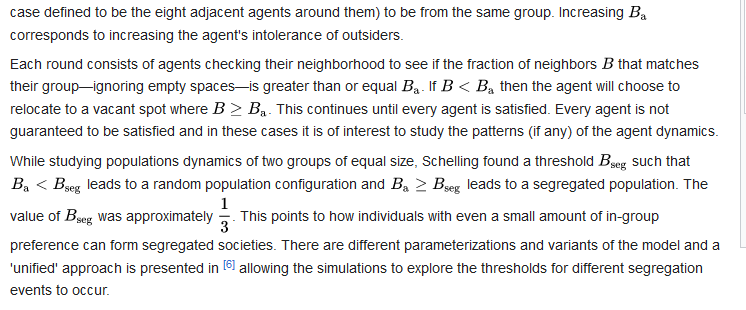

In [83]:
def schelling_model(grid_size=20, minority_ratio=0.2, threshold=0.3, max_iterations=100, radius=1):
    grid = initialize_grid(grid_size, minority_ratio)
    grid_history = [grid.copy()]

    for i in range(max_iterations):
        new_grid = move_unhappy_agents(grid, threshold, radius)
        
        if np.array_equal(grid, new_grid):  # Converged, no more movements needed
            break
        grid = new_grid
        grid_history.append(grid.copy())

    return grid_history

In [124]:
# Increasing the threshold incresases the agent intolerance
grid_history = schelling_model(grid_size=100, minority_ratio=0.5, threshold=0.4, max_iterations=100, radius=1)

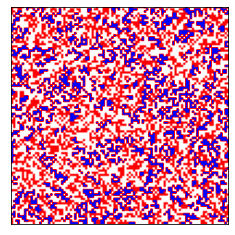

In [133]:
fig = plt.figure()
    
images = []
    
custom_cmap = colors.LinearSegmentedColormap.from_list("", ["white","red","blue"])

for grid in grid_history:
    image = plt.imshow(grid, cmap=custom_cmap, vmin=0, vmax=2)
    plt.xticks([])
    plt.yticks([])
    images.append([image])

In [135]:
ani = animation.ArtistAnimation(fig, images, interval=500, blit=True, repeat=False) # Create the animation

In [136]:
ani # Display the animation

In [ ]:
## TODO Cuando los actores estan muy incontentos van desapareciendo. Por ejemplo a .9 de threshold

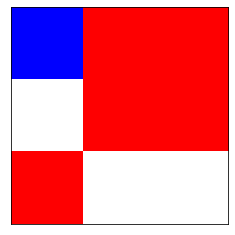

[[2 1 1]
 [0 1 1]
 [1 0 0]]


5

In [57]:
grid_test = initialize_grid(3,.5)
visualize_grid(grid_test)
count_neighbors(grid_test,1,1,1) ## Y and X are inverted. To review. Fixing it only at the count neighbors doesn't work

In [64]:
calculate_happiness(grid_test,0,0,1)

[[2 1]
 [0 1]]
[[2 1]
 [0 1]]
x,y 0,0 similar_neighbors 0 total_neighbors 2


0.0

In [62]:
new_grid_test = move_unhappy_agents(grid_test, .1, radius=1)

[[2 1]
 [0 1]]
[[2 1]
 [0 1]]
x,y 0,0 similar_neighbors 0 total_neighbors 2
empty_spaces start
[[1 0]
 [2 1]
 [2 2]]
empty_spaces end
Random
2
new x, new y
2 2
[[0 1 1]
 [0 1 1]]
[[0 1 1]
 [0 1 1]]
x,y 0,1 similar_neighbors 3 total_neighbors 3
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
x,y 0,2 similar_neighbors 3 total_neighbors 3
[[0 1 1]
 [0 1 1]
 [1 0 2]]
[[0 1 1]
 [0 1 1]
 [1 0 2]]
x,y 1,1 similar_neighbors 4 total_neighbors 5
[[1 1]
 [1 1]
 [0 2]]
[[1 1]
 [1 1]
 [0 2]]
x,y 1,2 similar_neighbors 3 total_neighbors 4
[[0 1]
 [1 0]]
[[0 1]
 [1 0]]
x,y 2,0 similar_neighbors 1 total_neighbors 1
[[1 1]
 [0 2]]
[[1 1]
 [0 2]]
x,y 2,2 similar_neighbors 0 total_neighbors 2
empty_spaces start
[[0 0]
 [1 0]
 [2 1]]
empty_spaces end
Random
0
new x, new y
2 1


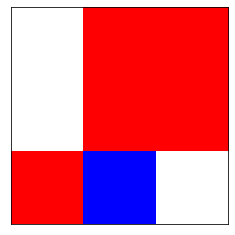

In [65]:
visualize_grid(new_grid_test)

In [61]:
grid_test.shape[1]

3

## Recommended Readings

Once you have completed the interaction portion of the module, please read the following recommended reading.

- Chapter 2 - Simple Rules, Pages 46 - 45. Tranquillo, J. V. (2019). An introduction to complex systems: Making sense of a changing world. Springer. https://mcgill.on.worldcat.org/oclc/1087498746